<a href="https://colab.research.google.com/github/savaris/Python_Applications/blob/main/Regression_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
# Creating a regression model of Boston house prices based on multiple variables.

In [4]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

data_url = "http://lib.stat.cmu.edu/datasets/boston"
raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
target = raw_df.values[1::2, 2]


In [5]:
feature_names = [
    "CRIM", "ZN", "INDUS", "CHAS", "NOX", "RM",
    "AGE", "DIS", "RAD", "TAX", "PTRATIO", "B", "LSTAT"
]
df = pd.DataFrame(data, columns=feature_names)
df['MEDV'] = target

print("Data Shape:",data.shape)
print("Data Target:", target.shape)
print(data[:5])
print(target[:5])

Data Shape: (506, 13)
Data Target: (506,)
[[6.3200e-03 1.8000e+01 2.3100e+00 0.0000e+00 5.3800e-01 6.5750e+00
  6.5200e+01 4.0900e+00 1.0000e+00 2.9600e+02 1.5300e+01 3.9690e+02
  4.9800e+00]
 [2.7310e-02 0.0000e+00 7.0700e+00 0.0000e+00 4.6900e-01 6.4210e+00
  7.8900e+01 4.9671e+00 2.0000e+00 2.4200e+02 1.7800e+01 3.9690e+02
  9.1400e+00]
 [2.7290e-02 0.0000e+00 7.0700e+00 0.0000e+00 4.6900e-01 7.1850e+00
  6.1100e+01 4.9671e+00 2.0000e+00 2.4200e+02 1.7800e+01 3.9283e+02
  4.0300e+00]
 [3.2370e-02 0.0000e+00 2.1800e+00 0.0000e+00 4.5800e-01 6.9980e+00
  4.5800e+01 6.0622e+00 3.0000e+00 2.2200e+02 1.8700e+01 3.9463e+02
  2.9400e+00]
 [6.9050e-02 0.0000e+00 2.1800e+00 0.0000e+00 4.5800e-01 7.1470e+00
  5.4200e+01 6.0622e+00 3.0000e+00 2.2200e+02 1.8700e+01 3.9690e+02
  5.3300e+00]]
[24.  21.6 34.7 33.4 36.2]


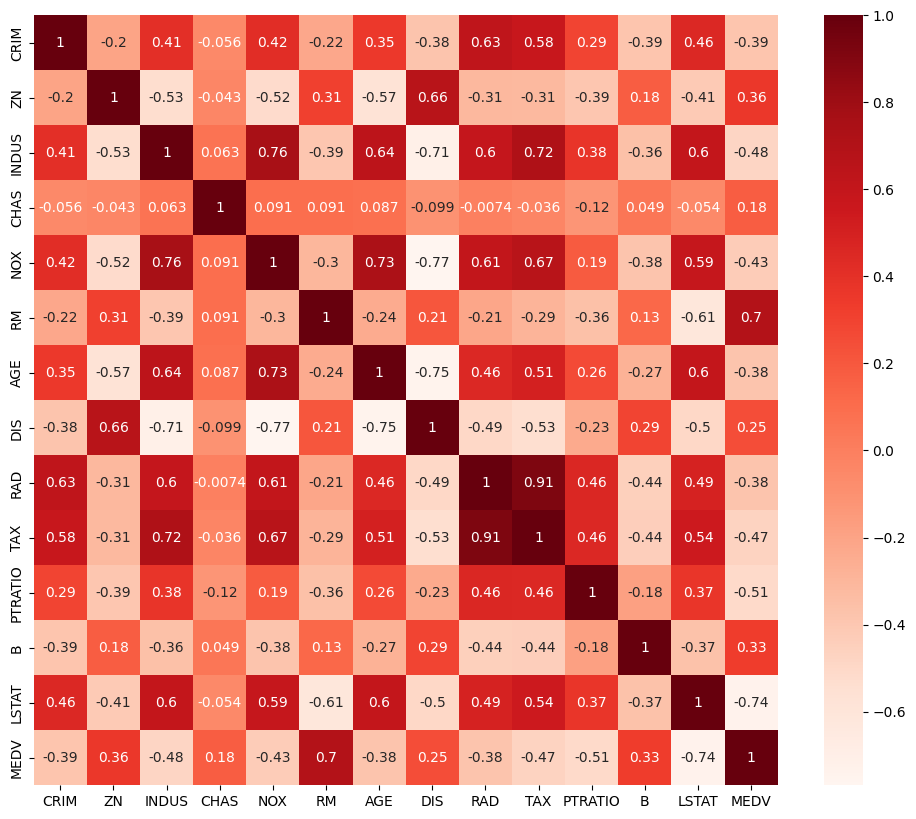

In [6]:
corr_matrix = df.corr()

plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap=plt.cm.Reds)
plt.show()

In [7]:
# Heatmap to show correlation between features within the Boston data set.

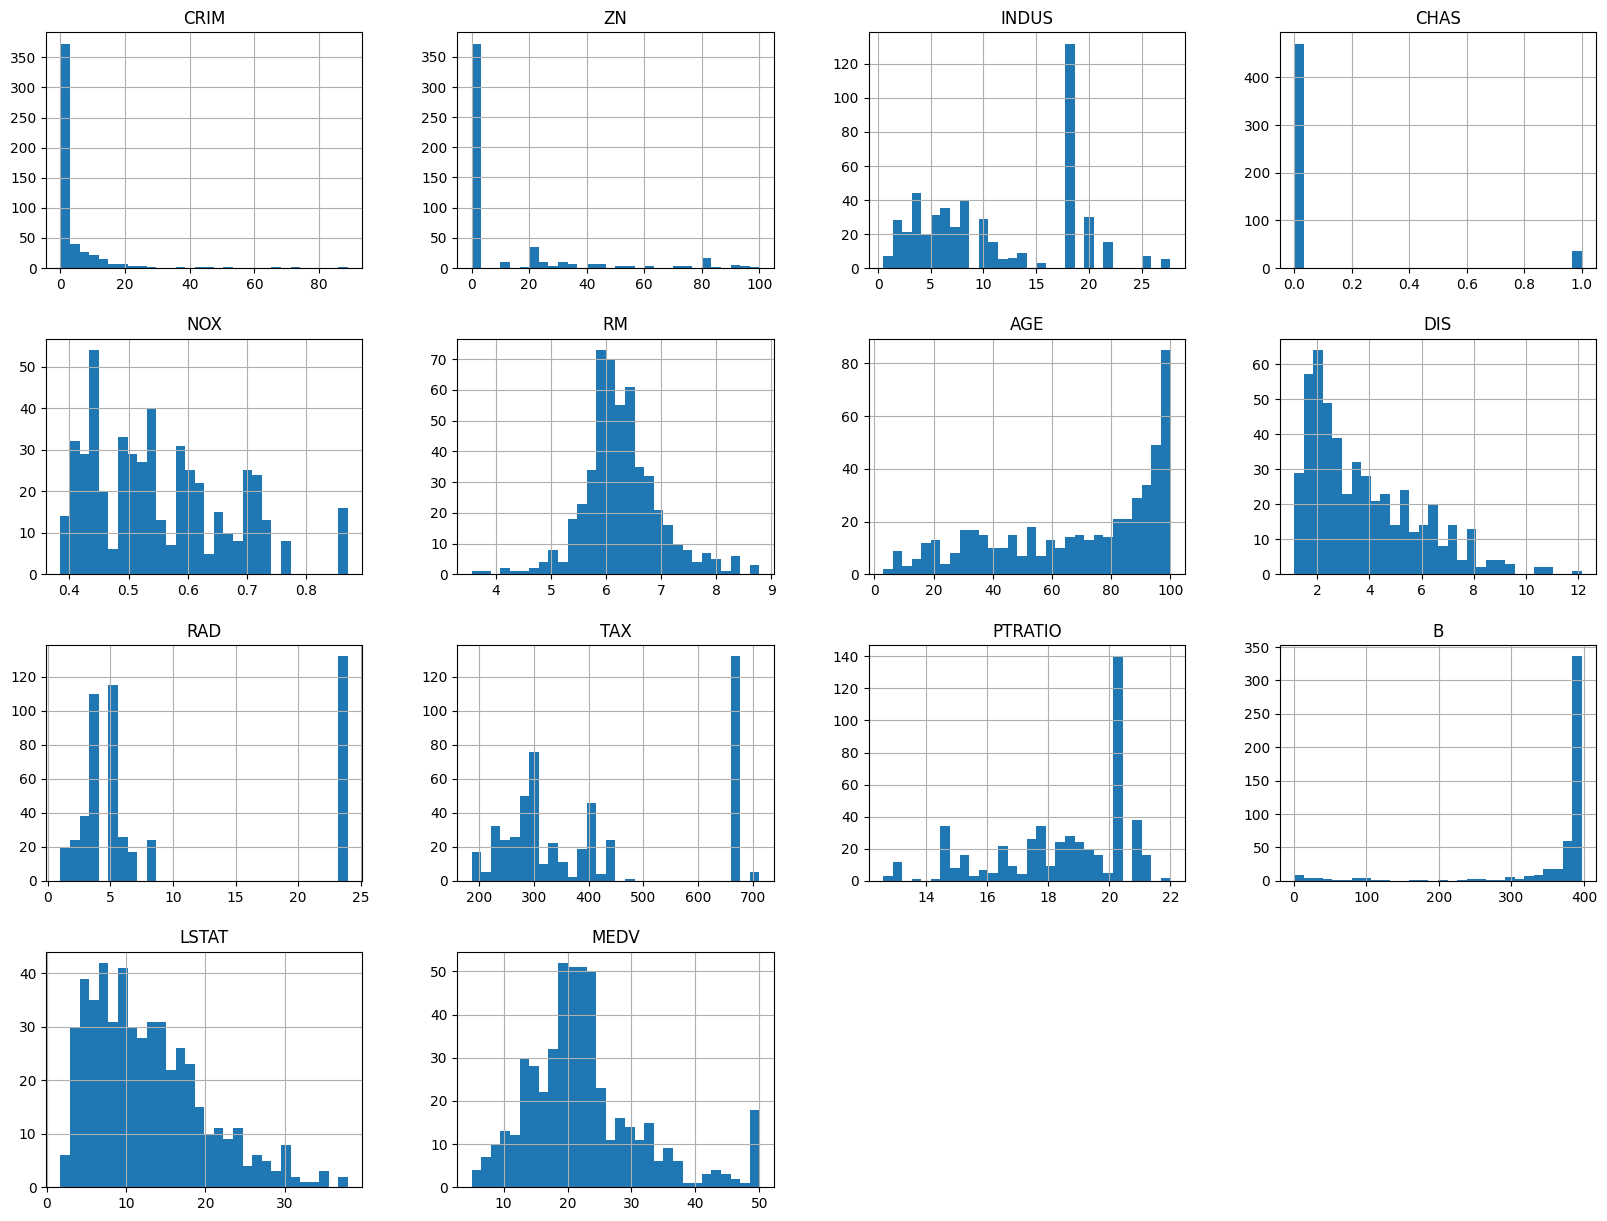

In [8]:
df.hist(bins=30, figsize=(20,15))
plt.show()

In [9]:
# Dropping 'RAD' and 'NOX' from the dataset to improve model due to high correlation. (Due to the natural correlation that's indicative of the fact that higher nitric oxides level are higher near highways)

In [10]:
print(df.head())

      CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   
3  0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0  222.0   
4  0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0  222.0   

   PTRATIO       B  LSTAT  MEDV  
0     15.3  396.90   4.98  24.0  
1     17.8  396.90   9.14  21.6  
2     17.8  392.83   4.03  34.7  
3     18.7  394.63   2.94  33.4  
4     18.7  396.90   5.33  36.2  


In [11]:
df2 = df.drop(['RAD', 'NOX'], axis=1)
print(df2.head())

      CRIM    ZN  INDUS  CHAS     RM   AGE     DIS    TAX  PTRATIO       B  \
0  0.00632  18.0   2.31   0.0  6.575  65.2  4.0900  296.0     15.3  396.90   
1  0.02731   0.0   7.07   0.0  6.421  78.9  4.9671  242.0     17.8  396.90   
2  0.02729   0.0   7.07   0.0  7.185  61.1  4.9671  242.0     17.8  392.83   
3  0.03237   0.0   2.18   0.0  6.998  45.8  6.0622  222.0     18.7  394.63   
4  0.06905   0.0   2.18   0.0  7.147  54.2  6.0622  222.0     18.7  396.90   

   LSTAT  MEDV  
0   4.98  24.0  
1   9.14  21.6  
2   4.03  34.7  
3   2.94  33.4  
4   5.33  36.2  


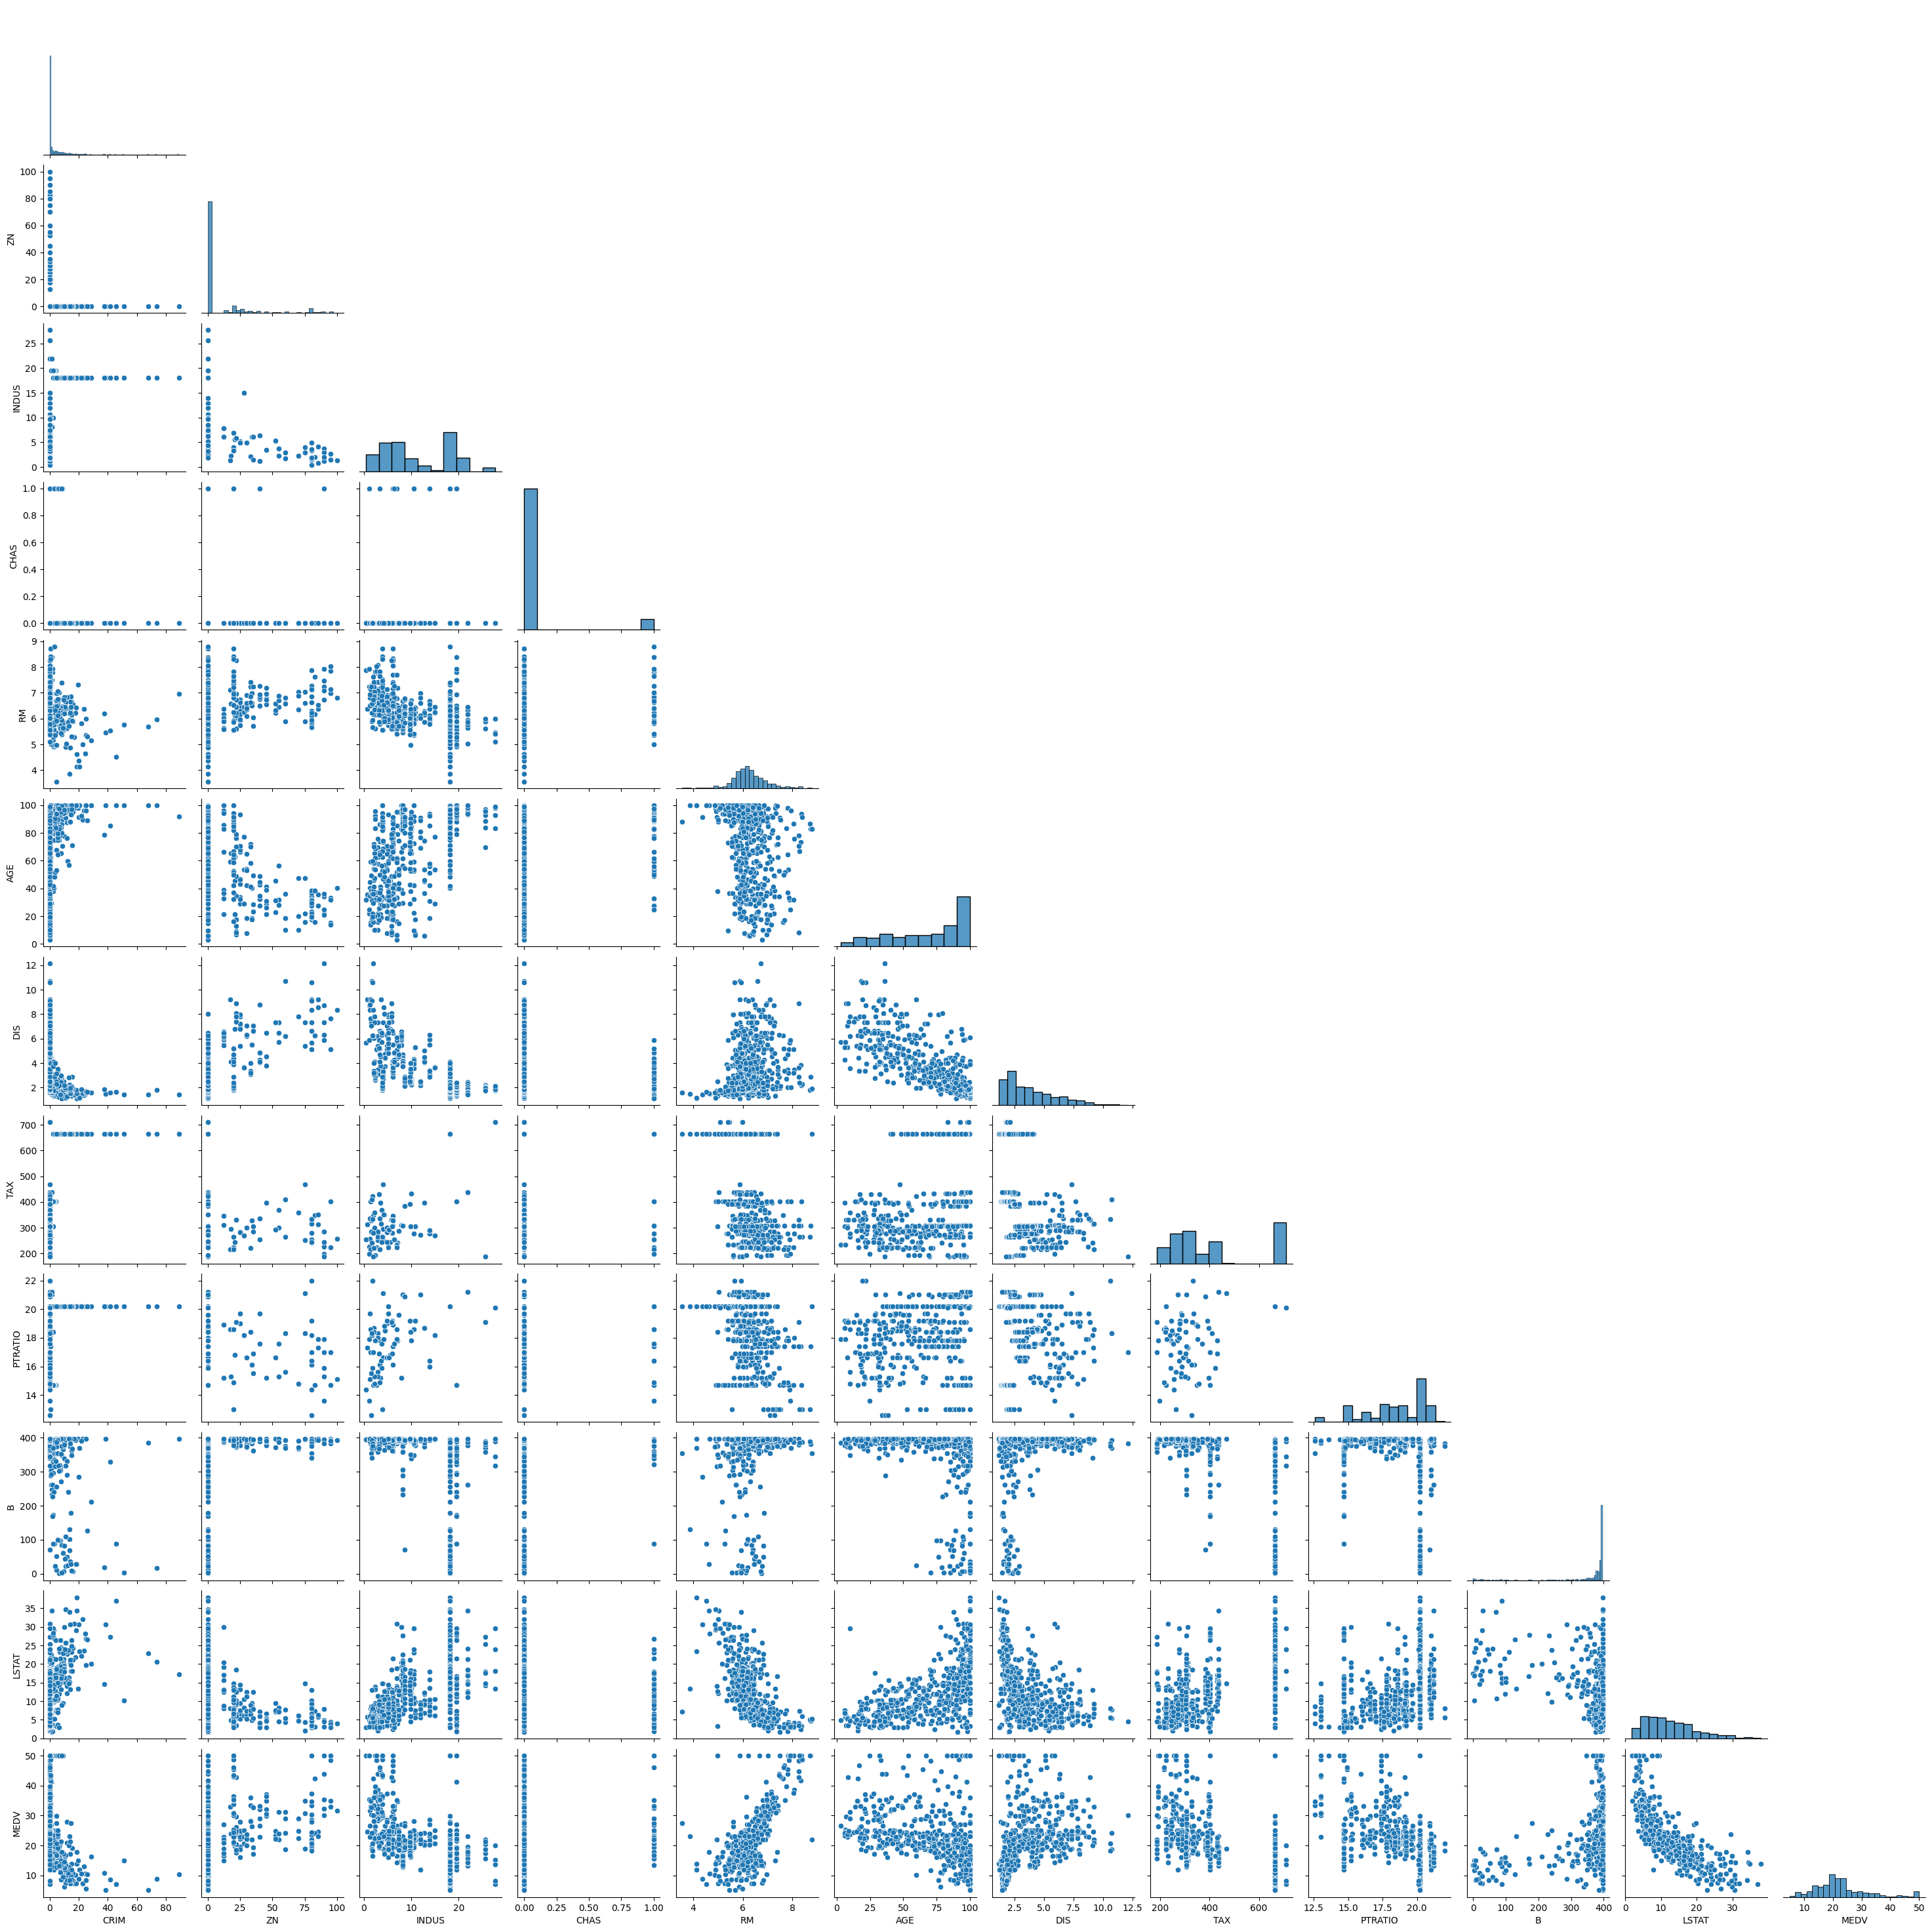

In [12]:
sns.pairplot(df2, diag_kind='hist', corner=True)
plt.show()

In [13]:
# The Pairplot shows the distribution of each variable on the diagonal whislt the scatterplot maxtrix shows the relationship between each variable pair on the off-diagonal.

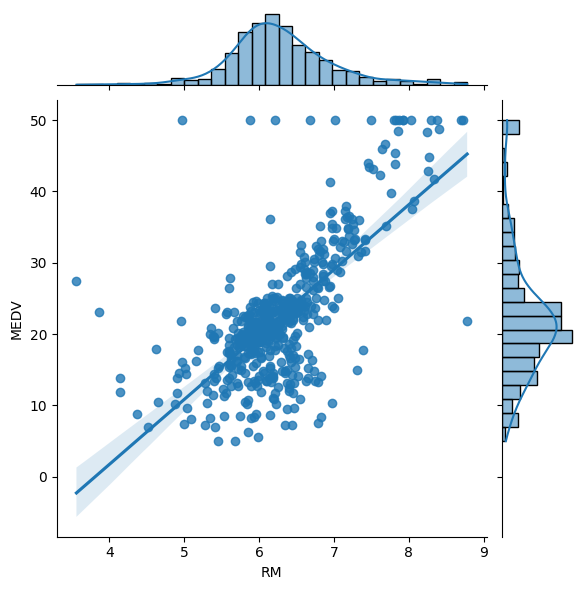

In [14]:
sns.jointplot(x='RM', y='MEDV', data=df2, kind='reg')
plt.show()

In [15]:
# Scatterplot of 'RM' and 'MEDV' shows a positive correlation between the two variables showing that houses with more room will likely have a higher median value.

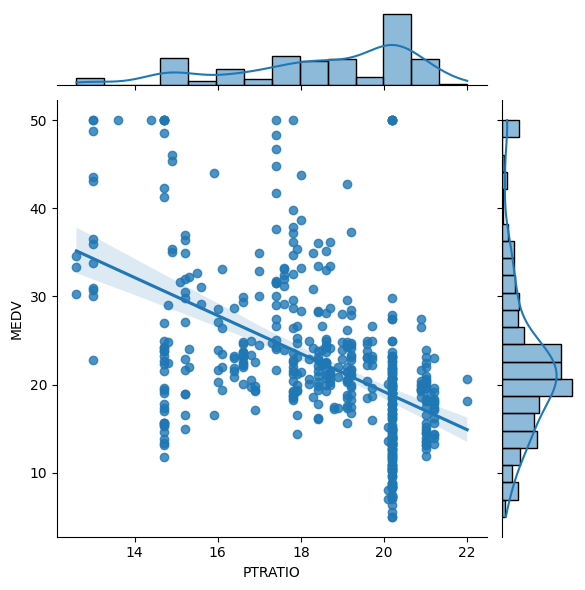

In [16]:
sns.jointplot(x='PTRATIO', y='MEDV', data=df2, kind='reg')
plt.show()

In [17]:
# Scatterplot of 'PTRATIO' and 'MEDV' shows a negative correlation as when the PTRATIO increases the MEDV decreases.

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


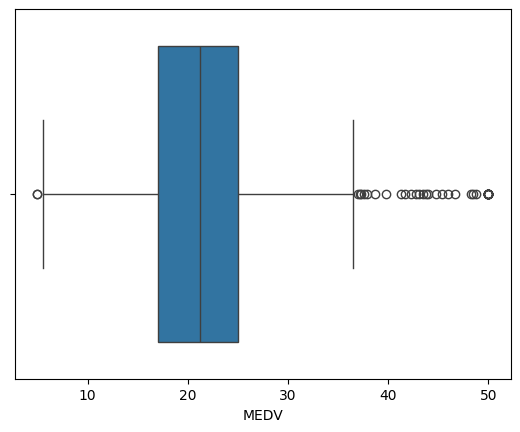

In [18]:
sns.boxplot(x=df2['MEDV'])
plt.show()

In [19]:
# Boxplot showing representation of the MEDV with outliers located outside the box which maybe indicative of errors or maybe true observations that are drastically different to the majority of the datapoints.

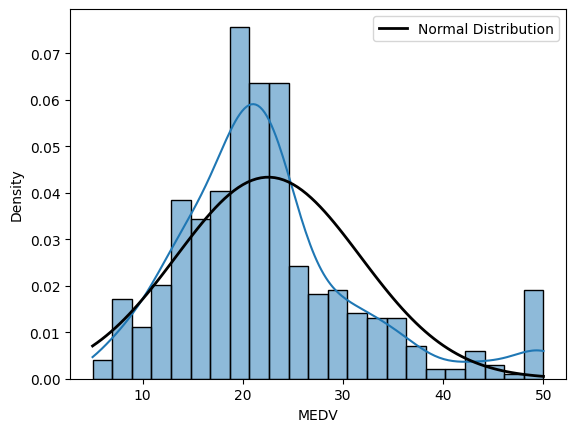

In [20]:
sns.histplot(df2['MEDV'], kde=True, stat="density")

# Fitted Distribution
xmin, xmax = df2['MEDV'].min(), df2['MEDV'].max()
x = np.linspace(xmin, xmax, 100)
p = stats.norm.pdf(x, df2['MEDV'].mean(), df2['MEDV'].std())
plt.plot(x, p, 'k', linewidth=2, label='Normal Distribution')

plt.legend()
plt.show()

In [21]:
# By using a normalised distribtuion curve we can see that the data set is not ideally distributed however follows a relatively close pattern to that of the normal distribution. The is a slight disruption in the data towards the tail end of the MEDV axis which could be consider as outliers and potentially removed for training model purposes to gain better acuracy.
stats.norm.pdf(x, df2['MEDV'].mean(), df2['MEDV'].std())

array([0.00704883, 0.00773579, 0.00846898, 0.00924904, 0.01007631,
       0.01095079, 0.01187213, 0.01283959, 0.01385201, 0.0149078 ,
       0.01600492, 0.01714087, 0.01831265, 0.0195168 , 0.0207494 ,
       0.02200601, 0.0232818 , 0.02457146, 0.02586928, 0.02716922,
       0.02846486, 0.02974953, 0.03101633, 0.03225819, 0.03346791,
       0.03463829, 0.03576214, 0.03683238, 0.0378421 , 0.03878465,
       0.0396537 , 0.04044332, 0.04114802, 0.04176287, 0.04228351,
       0.04270619, 0.04302786, 0.0432462 , 0.04335961, 0.04336725,
       0.04326908, 0.04306581, 0.04275892, 0.04235065, 0.04184394,
       0.04124243, 0.04055041, 0.03977272, 0.03891478, 0.03798246,
       0.03698203, 0.03592011, 0.03480356, 0.03363945, 0.03243496,
       0.0311973 , 0.02993366, 0.02865114, 0.02735666, 0.02605694,
       0.02475843, 0.02346723, 0.02218911, 0.02092941, 0.01969307,
       0.01848455, 0.01730787, 0.01616656, 0.01506367, 0.01400177,
       0.01298299, 0.01200896, 0.0110809 , 0.01019963, 0.00936

In [22]:
max_value = df2['MEDV'].max()
print(max_value)

50.0


In [23]:
# Training model to ustilise different regression executions.

In [24]:
from sklearn.model_selection import train_test_split

X = df.drop('MEDV', axis=1)
y = df['MEDV']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,
random_state=42)

from sklearn.linear_model import LinearRegression


X = df2[['RM']]
y = df2['MEDV']
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)


# Perfomance Metrics
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
adj_r2 = 1 - (1-r2)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)

print("MSE:", mse)
print("MAE:", mae)
print("R-squared:", r2)
print("Adjusted R-squared:", adj_r2)

MSE: 21.517444231177183
MAE: 3.1627098714574013
R-squared: 0.7112260057484936
Adjusted R-squared: 0.6840226584639314


MSE: 26.911862377716773
MAE: 3.2581121332112204
R-squared: 0.6330223095284498
Adjusted R-squared: 0.5881694806930382


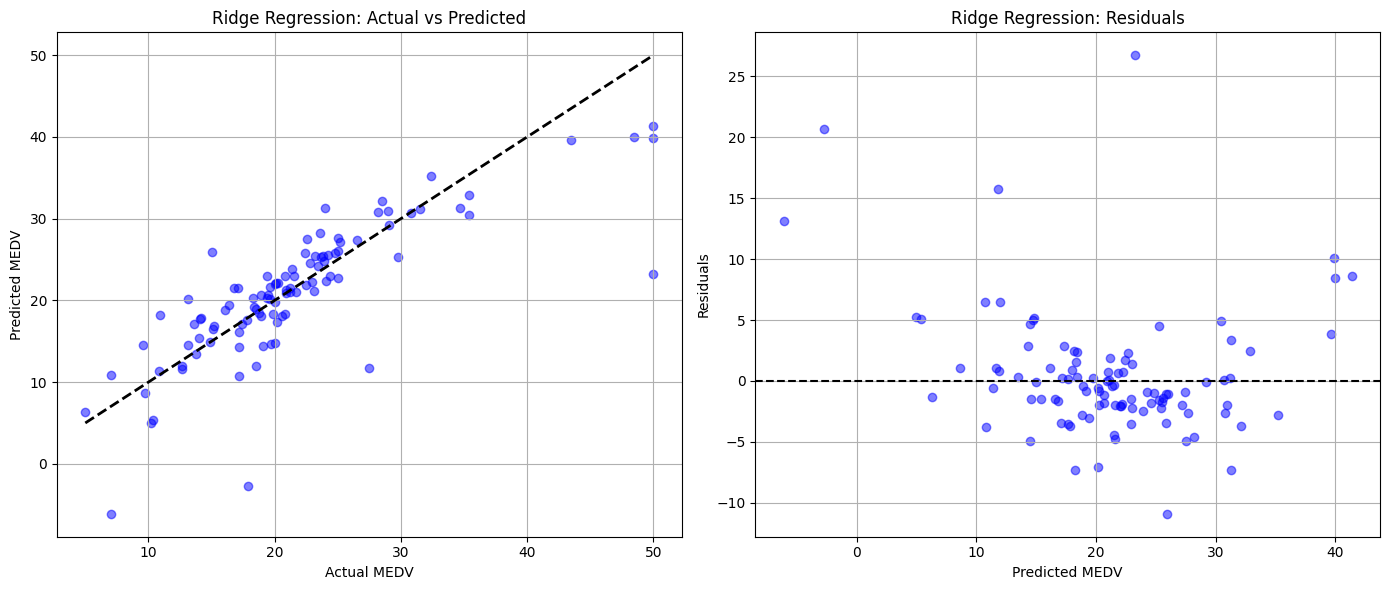

In [25]:
# Ridge Regression
from sklearn.linear_model import Ridge

X = df2.drop('MEDV', axis=1)
y = df2['MEDV']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,
                                                    random_state=42)

ridge = Ridge(alpha=1.0)
ridge.fit(X_train, y_train)

y_pred = ridge.predict(X_test)

mse = mean_squared_error(y_test, y_pred)

print('MSE:', mse)
print('MAE:', mean_absolute_error(y_test, y_pred))
print('R-squared:', r2_score(y_test, y_pred))
print('Adjusted R-squared:', 1 - (1-r2_score(y_test, y_pred))*(len(y_test)-1)/
 (len(y_test)-X_test.shape[1]-1))

# Scatter Plot of Actual vs Predicted Values
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.scatter(y_test, y_pred, color='blue', alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Actual MEDV')
plt.ylabel('Predicted MEDV')
plt.title('Ridge Regression: Actual vs Predicted')
plt.grid(True)

# Residual Plot
plt.subplot(1, 2, 2)
residuals = y_test - y_pred
plt.scatter(y_pred, residuals, color='blue', alpha=0.5)
plt.axhline(y=0, color='k', linestyle='--')
plt.xlabel('Predicted MEDV')
plt.ylabel('Residuals')
plt.title('Ridge Regression: Residuals')
plt.grid(True)

plt.tight_layout()
plt.show()

In [26]:
# Lasso Regression
from sklearn.linear_model import Lasso

lasso = Lasso(alpha=1.0)
lasso.fit(X_train, y_train)

y_pred = lasso.predict(X_test)
mse = mean_squared_error(y_test, y_pred)

print('MSE:', mse)
print('MAE:', mean_absolute_error(y_test, y_pred))
print('R-squared:', r2_score(y_test, y_pred))
print('Adjusted R-squared:', 1 - (1-r2_score(y_test, y_pred))*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1))



MSE: 26.441457906002125
MAE: 3.449793944342835
R-squared: 0.6394368766139396
Adjusted R-squared: 0.59536805042231


MSE: 35.36977373731789
MAE: 4.158012918574162
R-squared: 0.5176878620868068
Adjusted R-squared: 0.50292320480375


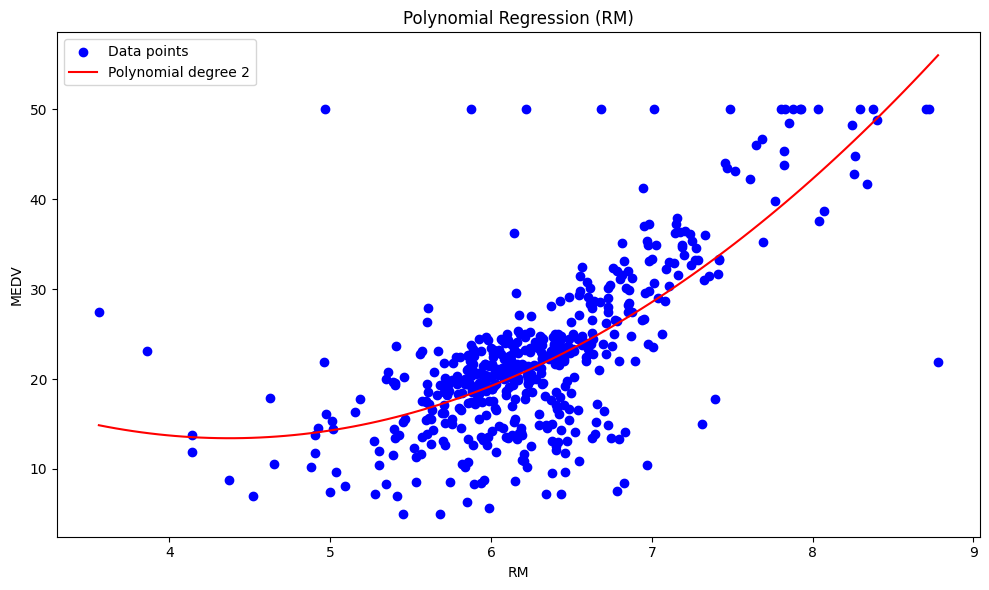

In [27]:
# Polynomial Regression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

X = df2[['RM']].values
y = df2['MEDV'].values

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,
                                                    random_state=42)

# Transform the features to include polynomial terms
degree = 2
poly_features = PolynomialFeatures(degree=degree)
X_train_poly = poly_features.fit_transform(X_train)
X_test_poly = poly_features.transform(X_test)

# Train the polynomial regression model
poly_reg = LinearRegression()
poly_reg.fit(X_train_poly, y_train)

# Make predictions
y_pred = poly_reg.predict(X_test_poly)
mse = mean_squared_error(y_test, y_pred)

print('MSE:', mse)
print('MAE:', mean_absolute_error(y_test, y_pred))
print('R-squared:', r2_score(y_test, y_pred))
print('Adjusted R-squared:', 1 - (1 - r2_score(y_test, y_pred)) *
      (len(y_test) - 1) / (len(y_test) - X_test_poly.shape[1] - 1))

# For visualization, we'll plot based on the 'RM' feature

plt.figure(figsize=(10, 6))

# Plotting for 'RM'
plt.scatter(X, y, color='blue', label='Data points')

# Generate predictions for plotting
X_range_rm = np.linspace(X.min(), X.max(), 100).reshape(-1, 1)
X_range_poly_rm = poly_features.transform(X_range_rm)
y_range_pred_rm = poly_reg.predict(X_range_poly_rm)

plt.plot(X_range_rm, y_range_pred_rm, color='red',
         label=f'Polynomial degree {degree}')
plt.xlabel('RM')
plt.ylabel('MEDV')
plt.legend()
plt.title('Polynomial Regression (RM)')

plt.tight_layout()
plt.show()


In [28]:
# SVR Regression
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

svr = SVR(kernel='linear', C=1.0, epsilon=0.1)
svr.fit(X_train_scaled, y_train)

y_pred = svr.predict(X_test_scaled)
mse = mean_squared_error(y_test, y_pred)

print('MSE:', mse)
print('MAE:', mean_absolute_error(y_test, y_pred))
print('R-squared:', r2_score(y_test, y_pred))
print('Adjusted R-squared:', 1 - (1-r2_score(y_test, y_pred))*
(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1))

MSE: 46.49583914883749
MAE: 4.487077701618615
R-squared: 0.36596971893311603
Adjusted R-squared: 0.35962941612244714


MSE: 35.80544005184313
MAE: 4.180510616224273
R-squared: 0.5117469942391358
Adjusted R-squared: 0.5068644641815272


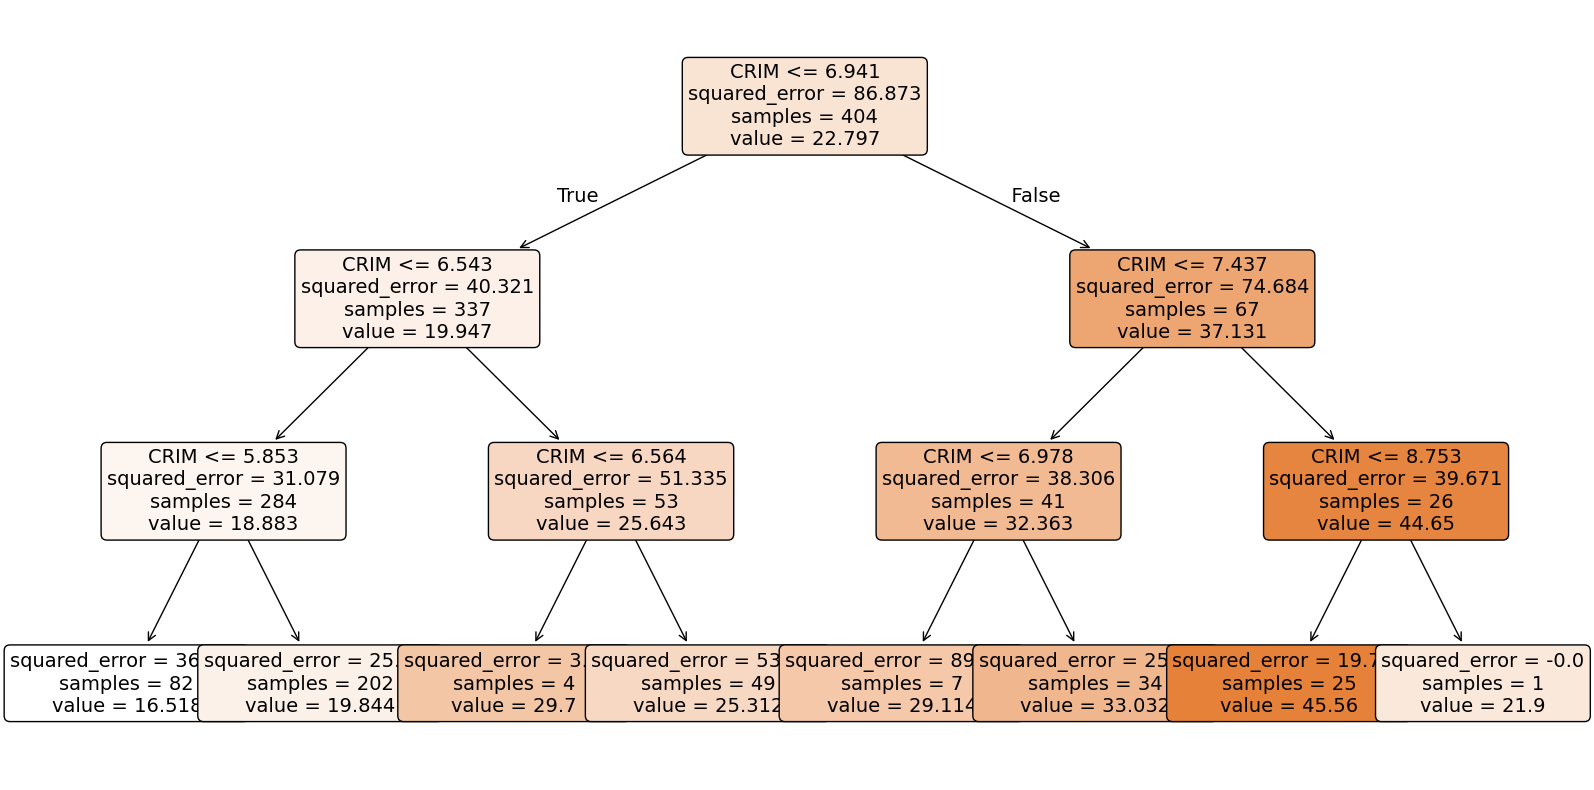

In [33]:
# Decision Tree
from sklearn.tree import DecisionTreeRegressor
from sklearn import tree

# Train the Decision Tree Regressor
dt = DecisionTreeRegressor(max_depth=3, random_state=42)
dt.fit(X_train, y_train)

# Predict and calculate performance metrics
y_pred = dt.predict(X_test)
mse = mean_squared_error(y_test, y_pred)

print('MSE:', mse)
print('MAE:', mean_absolute_error(y_test, y_pred))
print('R-squared:', r2_score(y_test, y_pred))
print('Adjusted R-squared:', 1 - (1 - r2_score(y_test, y_pred)) *
      (len(y_test) - 1) / (len(y_test) - X_test.shape[1] - 1))

# Visualize the Decision Tree
plt.figure(figsize=(20, 10))
tree.plot_tree(dt, feature_names=df2.drop('MEDV', axis=1).columns,
               filled=True, rounded=True, fontsize=14)
plt.show()

MSE: 10.016647794117647
MAE: 2.2086176470588237
R-squared: 0.863410186104552
Adjusted R-squared: 0.8467158755173305


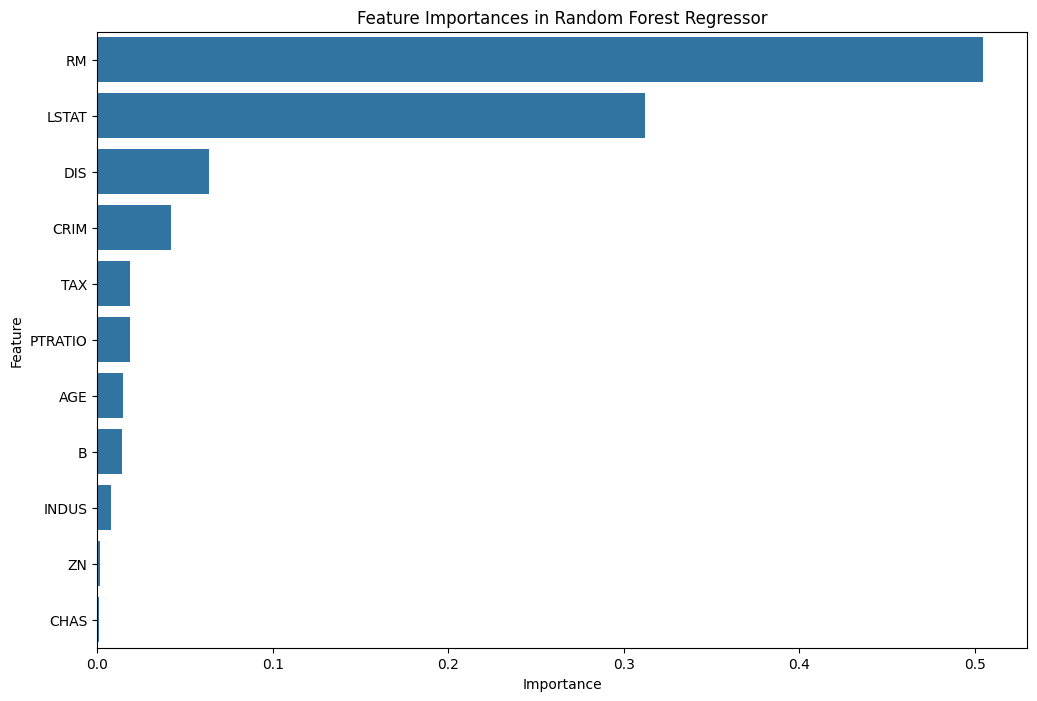

In [41]:
# Random Forest
from sklearn.ensemble import RandomForestRegressor

# Train the Random Forest model
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Predict using the trained model
y_pred = rf.predict(X_test)

# Performance metrics
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
adj_r2 = 1 - (1 - r2) * (len(y_test) - 1) / (len(y_test) - X_test.shape[1] - 1)

print('MSE:', mse)
print('MAE:', mae)
print('R-squared:', r2)
print('Adjusted R-squared:', adj_r2)

# Feature importance
feature_importances = rf.feature_importances_
features = df2.drop('MEDV', axis=1).columns  # Use the original DataFrame to get feature names

# Create a DataFrame for visualization
importance_df = pd.DataFrame({'Feature': features, 'Importance': feature_importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Plot feature importances
plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=importance_df)
plt.title('Feature Importances in Random Forest Regressor')
plt.show()

MSE: 8.515930717037554
MAE: 2.08340901745042
R-squared: 0.8838743843554348
Adjusted R-squared: 0.8696812535544323


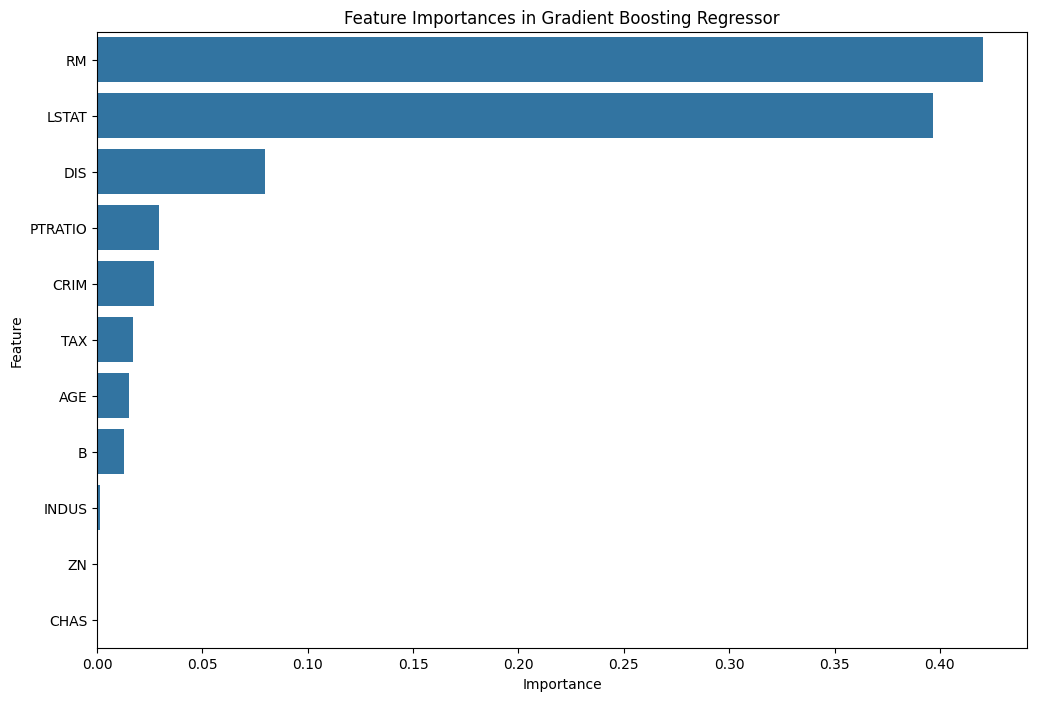

In [40]:
# Gradient Boosting
from sklearn.ensemble import GradientBoostingRegressor

gb = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1,
max_depth=3, random_state=42)
gb.fit(X_train, y_train)

y_pred = gb.predict(X_test)

mse = mean_squared_error(y_test, y_pred)

print('MSE:', mse)
print('MAE:', mean_absolute_error(y_test, y_pred))
print('R-squared:', r2_score(y_test, y_pred))
print('Adjusted R-squared:', 1 - (1-r2_score(y_test, y_pred))*
(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1))

# Feature importance
feature_importances = gb.feature_importances_
features = X.columns

# Create a DataFrame for visualization
importance_df = pd.DataFrame({'Feature': features, 'Importance': feature_importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Plot feature importances
plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=importance_df)
plt.title('Feature Importances in Gradient Boosting Regressor')
plt.show()

MSE: 26.13078071207373
MAE: 3.4243972356181103
R-squared: 0.6436733578172779
Adjusted R-squared: 0.6001223237727229


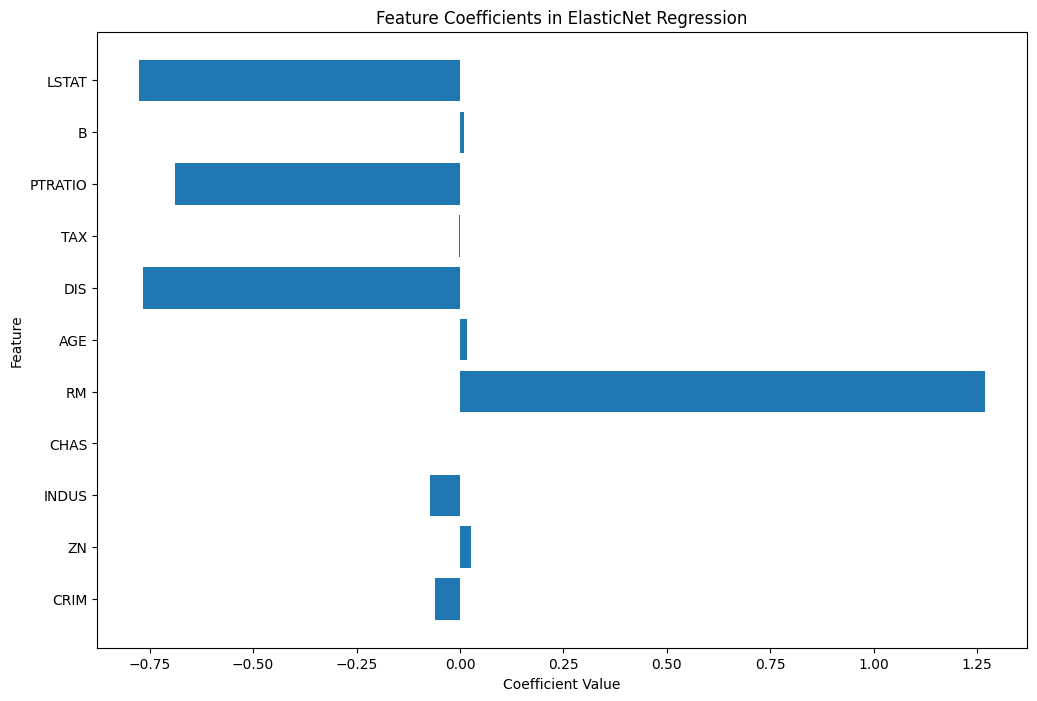

In [42]:
# Elasticnet Regression
from sklearn.linear_model import ElasticNet

elasticnet = ElasticNet(alpha=1.0, l1_ratio=0.5)
elasticnet.fit(X_train, y_train)

y_pred = elasticnet.predict(X_test)
mse = mean_squared_error(y_test, y_pred)

print('MSE:', mse)
print('MAE:', mean_absolute_error(y_test, y_pred))
print('R-squared:', r2_score(y_test, y_pred))
print('Adjusted R-squared:', 1 - (1-r2_score(y_test, y_pred))*
(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1))

# Coefficients
coefficients = elasticnet.coef_
features = X.columns

# Create a DataFrame for visualization
coef_df = pd.DataFrame({'Feature': features, 'Coefficient': coefficients})

# Plot coefficients
plt.figure(figsize=(12, 8))
plt.barh(coef_df['Feature'], coef_df['Coefficient'])
plt.xlabel('Coefficient Value')
plt.ylabel('Feature')
plt.title('Feature Coefficients in ElasticNet Regression')
plt.show()

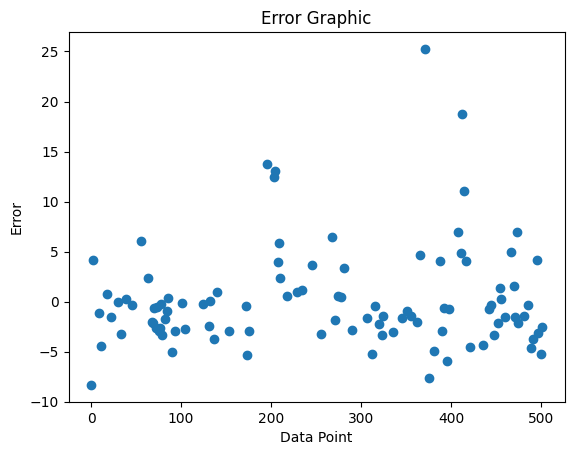

In [43]:
errors = y_test - y_pred
import matplotlib.pyplot as plt
plt.plot(errors, marker='o', linestyle='')
plt.title('Error Graphic')
plt.xlabel('Data Point')
plt.ylabel('Error')
plt.show()

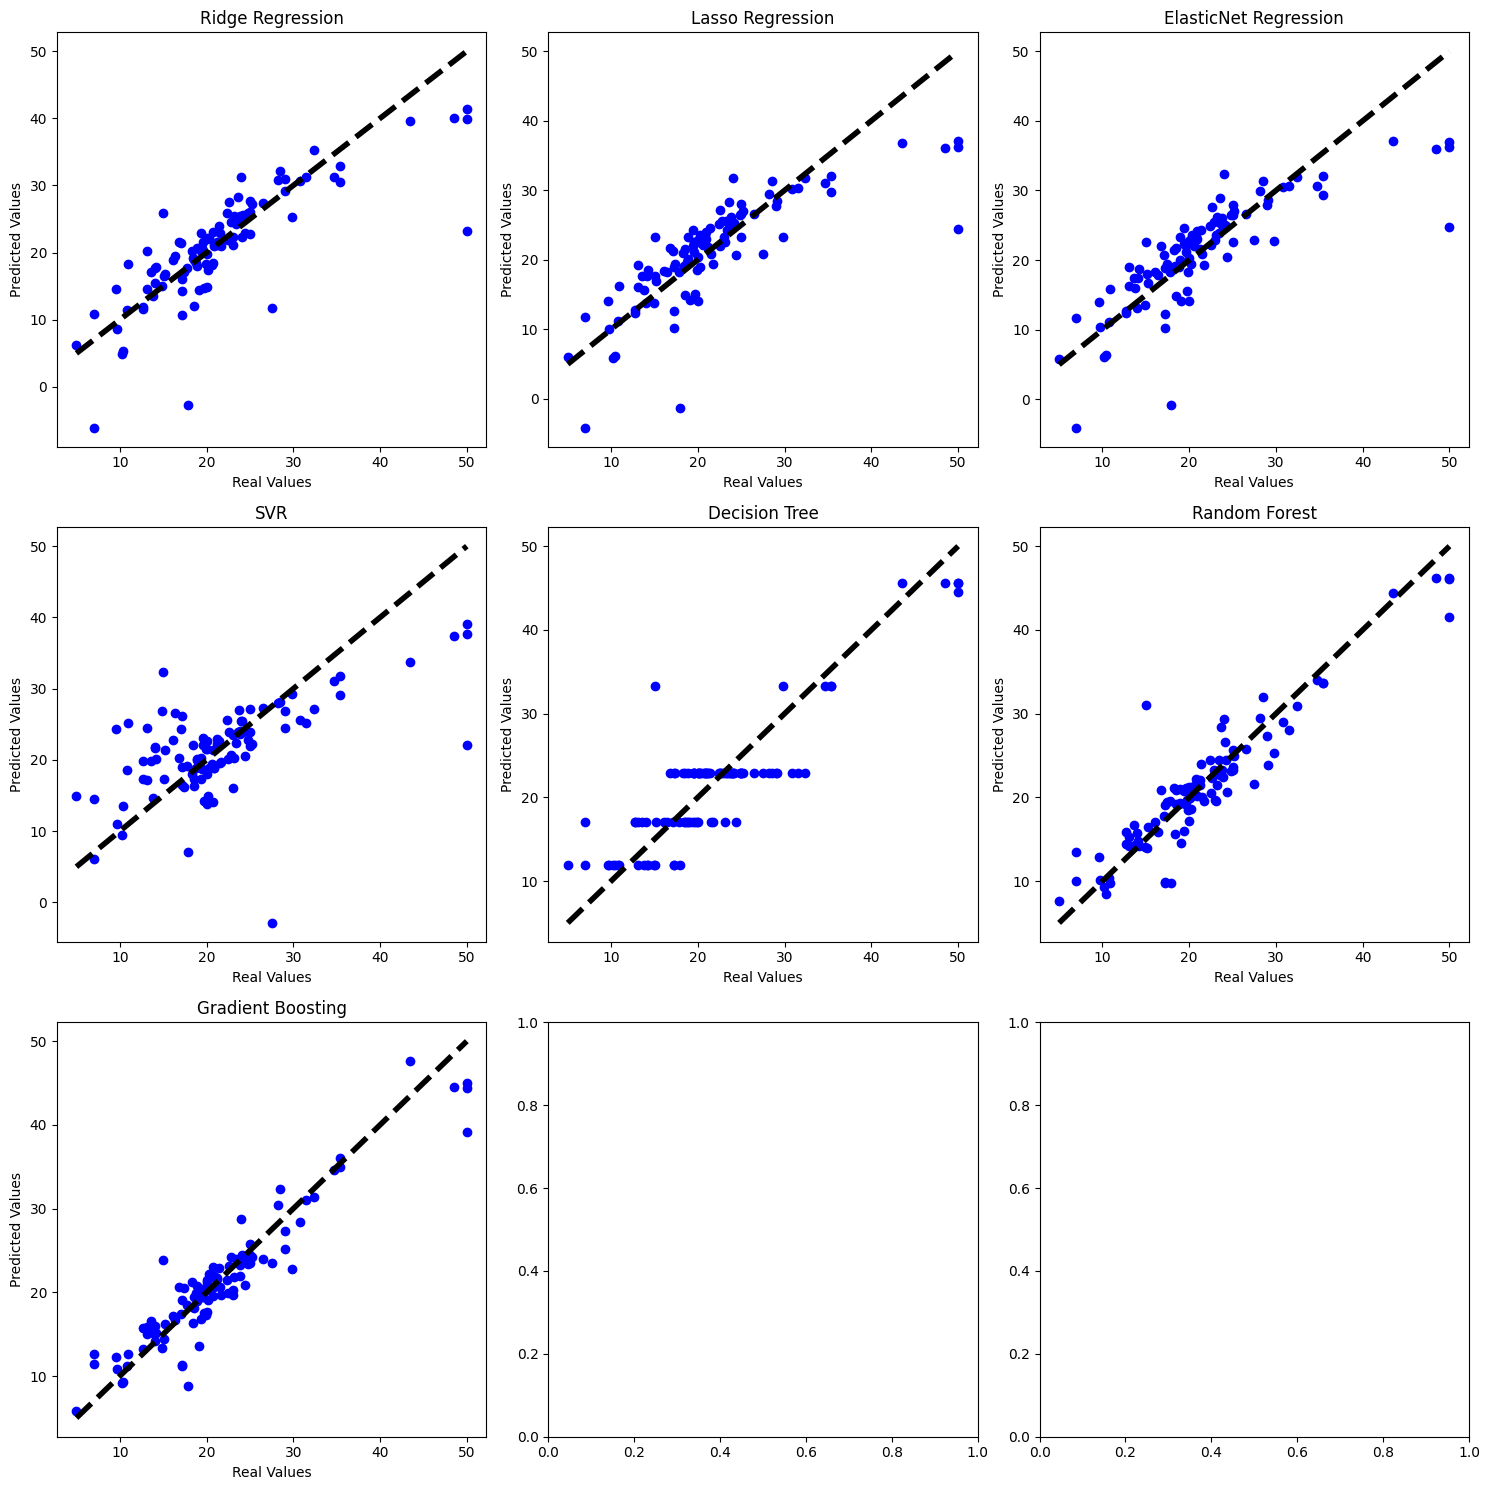

In [48]:
models = [ridge, lasso, elasticnet, svr, dt, rf, gb]
model_names = ['Ridge Regression', 'Lasso Regression', 'ElasticNet Regression', 'SVR', 'Decision Tree', 'Random Forest', 'Gradient Boosting']

fig, axs = plt.subplots(3, 3, figsize=(15, 15))

for i, model in enumerate(models):
    if model_names[i] == 'SVR':
        # Use only one feature for SVR (e.g., 'RM')
        X_train_svr = X_train[['RM']]  # Adjust feature name as needed
        X_test_svr = X_test[['RM']]    # Same for test set

        # Fit the SVR model on this subset
        model.fit(X_train_svr, y_train)
        y_pred = model.predict(X_test_svr)
    else:
        # Train and predict on all features for other models
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)

    # Scatter plot of actual vs predicted values
    axs[i//3, i%3].scatter(y_test, y_pred, color='blue')
    axs[i//3, i%3].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)
    axs[i//3, i%3].set_xlabel('Real Values')
    axs[i//3, i%3].set_ylabel('Predicted Values')
    axs[i//3, i%3].set_title(model_names[i])

plt.tight_layout()
plt.show()

In [56]:
# Assuming you have trained models in `models` and their names in `model_names`
models = [ridge, lasso, elasticnet, svr, dt, rf, gb]
model_names = ['Ridge Regression', 'Lasso Regression', 'ElasticNet Regression', 'SVR', 'Decision Tree', 'Random Forest', 'Gradient Boosting']

# Create an empty list to hold metric data for each model
metrics_list = []

# Calculate performance metrics for each model
for i, model in enumerate(models):
    try:
        # Predict using the model
        y_pred = model.predict(X_test)

        # Calculate metrics
        mse = mean_squared_error(y_test, y_pred)
        mae = mean_absolute_error(y_test, y_pred)
        r2 = r2_score(y_test, y_pred)
        adj_r2 = 1 - (1 - r2) * (len(y_test) - 1) / (len(y_test) - X_test.shape[1] - 1)

        # Append metrics to the list
        metrics_list.append({
            'Model': model_names[i],
            'Mean Squared Error': mse,
            'Mean Absolute Error': mae,
            'R2 Score': r2,
            'Adjusted R2 Score': adj_r2
        })
    except Exception as e:
        print(f"Error with model {model_names[i]}: {e}")

# Create a DataFrame from the list of metrics
df_metrics = pd.DataFrame(metrics_list)

# Create a pivot table to show all metrics for each model
df_metrics_pivot = pd.pivot_table(df_metrics, index='Model',
                                   values=['R2 Score', 'Adjusted R2 Score', 'Mean Absolute Error', 'Mean Squared Error'])

# Display the pivot table
print(df_metrics_pivot)

Error with model SVR: The feature names should match those that were passed during fit.
Feature names unseen at fit time:
- AGE
- B
- CHAS
- CRIM
- DIS
- ...

                       Adjusted R2 Score  Mean Absolute Error  \
Model                                                           
Decision Tree                   0.743422             3.177735   
ElasticNet Regression           0.600122             3.424397   
Gradient Boosting               0.869681             2.083409   
Lasso Regression                0.595368             3.449794   
Random Forest                   0.846716             2.208618   
Ridge Regression                0.588169             3.258112   

                       Mean Squared Error  R2 Score  
Model                                                
Decision Tree                   16.766567  0.771366  
ElasticNet Regression           26.130781  0.643673  
Gradient Boosting                8.515931  0.883874  
Lasso Regression                26.441458  0.63943